In [99]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import requests
import re
from bs4 import BeautifulSoup
from nltk.corpus import wordnet 

In [100]:
URL = "https://en.wikipedia.org/wiki/Web_mining"
page=requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
f=open('web1.txt','w')
f.write(soup.text)
f.close

<function TextIOWrapper.close()>

In [101]:
f=open('web1.txt','r')
a=[]
for i in f:
    a.append(i)
f.close()

In [102]:
a=[i for i in a if i != '\n']
token=[]
for i in a:
    token.append(word_tokenize(i))
token

[['Web', 'mining', '-', 'Wikipedia'],
 ['document.documentElement.className=',
  "''",
  'client-js',
  "''",
  ';',
  'RLCONF=',
  '{',
  '``',
  'wgBreakFrames',
  "''",
  ':',
  '!',
  '1',
  ',',
  "''",
  'wgSeparatorTransformTable',
  "''",
  ':',
  '[',
  '``',
  "''",
  ',',
  "''",
  "''",
  ']',
  ',',
  "''",
  'wgDigitTransformTable',
  "''",
  ':',
  '[',
  '``',
  "''",
  ',',
  "''",
  "''",
  ']',
  ',',
  "''",
  'wgDefaultDateFormat',
  "''",
  ':',
  "''",
  'dmy',
  "''",
  ',',
  "''",
  'wgMonthNames',
  "''",
  ':',
  '[',
  '``',
  "''",
  ',',
  "''",
  'January',
  "''",
  ',',
  "''",
  'February',
  "''",
  ',',
  "''",
  'March',
  "''",
  ',',
  "''",
  'April',
  "''",
  ',',
  "''",
  'May',
  "''",
  ',',
  "''",
  'June',
  "''",
  ',',
  "''",
  'July',
  "''",
  ',',
  "''",
  'August',
  "''",
  ',',
  "''",
  'September',
  "''",
  ',',
  "''",
  'October',
  "''",
  ',',
  "''",
  'November',
  "''",
  ',',
  "''",
  'December',
  "''",
  ']',
  '

In [103]:
tokens=[]
for i in token:
    tokens.append([j for j in i if j.isalnum()])
    #for j in i:
     #   if not j.isalnum():
      #      i.remove(j)
tokens

[['Web', 'mining', 'Wikipedia'],
 ['wgBreakFrames',
  '1',
  'wgSeparatorTransformTable',
  'wgDigitTransformTable',
  'wgDefaultDateFormat',
  'dmy',
  'wgMonthNames',
  'January',
  'February',
  'March',
  'April',
  'May',
  'June',
  'July',
  'August',
  'September',
  'October',
  'November',
  'December',
  'wgRequestId',
  'wgCSPNonce',
  '1',
  'wgCanonicalNamespace',
  'wgCanonicalSpecialPageName',
  '1',
  'wgNamespaceNumber',
  'wgPageName',
  'wgTitle',
  'Web',
  'mining',
  'wgCurRevisionId',
  'wgRevisionId',
  'wgArticleId',
  'wgIsArticle',
  '0',
  'wgIsRedirect',
  '1',
  'wgAction',
  'view',
  'wgUserName',
  'null',
  'wgUserGroups',
  'wgCategories',
  'CS1',
  'errors',
  'missing',
  'periodical',
  'Articles',
  'needing',
  'cleanup',
  'from',
  'June',
  '2009',
  'All',
  'pages',
  'needing',
  'cleanup',
  'Cleanup',
  'tagged',
  'articles',
  'without',
  'a',
  'reason',
  'field',
  'from',
  'June',
  '2009',
  'Wikipedia',
  'pages',
  'needing',

In [104]:
stop_words=set(stopwords.words('english'))
a=['.',',','{','}','`','/','``',')','(','[',']',"''",';']
for i in a:
   stop_words.add(i)

In [111]:
f=[]
words=[]
s=[]
d={}
for i in tokens:
    f.append([w for w in i if not w in stop_words and w.isalpha()])
    s.append([w for w in i if w in stop_words and w.isalpha()])
    d[' '.join(i)]=[w for w in i if w in stop_words and w.isalpha()]
for i in f:
    for j in i:
        words.append(j.lower())
print(len(words))
words=list(set(words))
words=[w for w in words if w.isalnum()]

2391


In [112]:
ps = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer() 
p=[]
l=[]
for w in words:
    p.append(ps.stem(w)) 
    l.append(lemmatizer.lemmatize(w))

In [113]:
import pandas as pd
data=pd.DataFrame(columns=['term', 'Stemmed Term', 'Lemmetized Word'])

In [114]:
data['term']=words
data['Stemmed Term']=p
data['Lemmetized Word']=l
data.head()

,term,Stemmed Term,Lemmetized Word
0,wgisprobablyeditable,wgisprobablyedit,wgisprobablyeditable
1,entityaccesscount,entityaccesscount,entityaccesscount
2,rarely,rare,rarely
3,october,octob,october
4,separate,separ,separate


In [115]:
len(data)

1077

In [116]:
data.shape

(1077, 3)

In [117]:
sentence=[]
stop=[]
tags=[]
for key in d:
    s=list(set(d[key]))
    if(len(s)!=0):
        tag = nltk.pos_tag(s) 
        t=[]
        pos=[]
        for i in tag:
            t.append(i[0])
            pos.append(i[1])
        sentence.append(key)
        stop.append(' , '.join(t))
        tags.append(' , '.join(pos))

In [118]:
da=pd.DataFrame(columns=['sentence', 'Stop word', 'POS tag'])
da

,sentence,Stop word,POS tag


In [119]:
da['sentence']=sentence
da['Stop word']=stop
da['POS tag']=tags
da

,sentence,Stop word,POS tag
0,wgBreakFrames 1 wgSeparatorTransformTable wgDi...,"to , be , from , a","TO , VB , IN , DT"
1,Articles using small message boxes Articles la...,from,IN
2,From Wikipedia the free encyclopedia,the,DT
3,Jump to navigation,to,TO
4,Jump to search,to,TO
...,...,...,...
87,Download as PDFPrintable version,as,IN
88,This page was last edited on 1 July 2020 at UTC,"at , was , on","IN , VBD , IN"
89,Text is available under the Creative Commons L...,"the , is , under","DT , VBZ , IN"
90,additional terms may apply By using this site ...,"and , of , to , you , the , a , this , is","CC , IN , TO , PRP , DT , DT , DT , VBZ"


In [53]:
URL = "https://en.wikipedia.org/wiki/Data_mining"
page=requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
fx=open('web2.txt','w')
fx.write(soup.text)
fx.close

<function TextIOWrapper.close()>

In [54]:
fx=open('web2.txt','r')
a1=[]
for i in fx:
    a1.append(i)
fx.close()

In [55]:
a1=[i for i in a1 if i != '\n']
token=[]
for i in a1:
    token.append(word_tokenize(i))
token

[['Data', 'mining', '-', 'Wikipedia'],
 ['document.documentElement.className=',
  "''",
  'client-js',
  "''",
  ';',
  'RLCONF=',
  '{',
  '``',
  'wgBreakFrames',
  "''",
  ':',
  '!',
  '1',
  ',',
  "''",
  'wgSeparatorTransformTable',
  "''",
  ':',
  '[',
  '``',
  "''",
  ',',
  "''",
  "''",
  ']',
  ',',
  "''",
  'wgDigitTransformTable',
  "''",
  ':',
  '[',
  '``',
  "''",
  ',',
  "''",
  "''",
  ']',
  ',',
  "''",
  'wgDefaultDateFormat',
  "''",
  ':',
  "''",
  'dmy',
  "''",
  ',',
  "''",
  'wgMonthNames',
  "''",
  ':',
  '[',
  '``',
  "''",
  ',',
  "''",
  'January',
  "''",
  ',',
  "''",
  'February',
  "''",
  ',',
  "''",
  'March',
  "''",
  ',',
  "''",
  'April',
  "''",
  ',',
  "''",
  'May',
  "''",
  ',',
  "''",
  'June',
  "''",
  ',',
  "''",
  'July',
  "''",
  ',',
  "''",
  'August',
  "''",
  ',',
  "''",
  'September',
  "''",
  ',',
  "''",
  'October',
  "''",
  ',',
  "''",
  'November',
  "''",
  ',',
  "''",
  'December',
  "''",
  ']',
  

In [120]:
tokens2=[]
for i in token:
    tokens2.append([j for j in i if j.isalnum()])

In [121]:
f1=[]
for i in tokens2:
    f1.append([w for w in i if not w in stop_words and w.isalpha()])
f_f=[]
f_f1=[]
for i in f:
    for j in i:
        f_f.append(j.lower())
for i in f1:
    for j in i:
        f_f1.append(j.lower())
f=list(set(f_f))
f1=list(set(f_f1))

In [122]:
d={}
d1={}
for i in f:
    c=0
    for j in f_f:
        if(i==j):
            c+=1
    d[i]=c
for i in f1:
    c=0
    for j in f_f1:
        if(i==j):
            c+=1
    d1[i]=c
d['organize']

1

In [123]:
bag=pd.DataFrame()
bag

""


In [124]:
bag['DOC']=['doc1','doc2']
fx=f+f1
for i in fx:
    if i in f and i in f1:
        bag[i]=[d[i],d1[i]]
    elif i in f1 and not i in f:
        bag[i]=[0,d1[i]]
    else:
        bag[i]=[d[i],0]
bag.head()

,DOC,wgisprobablyeditable,entityaccesscount,rarely,october,separate,martha,timestamp,lecture,store,...,missing,field,extraction,legal,publishing,involves,lack,template,wgvisualeditor,technologies
0,doc1,1,1,1,2,1,1,1,2,1,...,3,2,3,2,1,1,1,11,1,1
1,doc2,1,1,1,2,1,1,1,2,1,...,3,2,3,2,1,1,1,11,1,1


In [125]:
boolean=pd.DataFrame()
boolean

""


In [126]:
a1=[]
a2=[]
a3=[]
a=f_f+f_f1
a=list(set(a))
for i in a:
    if i in f_f1 and i in f_f:
        a1.append(i)
        a2.append(1)
        a3.append(1)
    elif i in f_f1 and not i in f_f:
        a1.append(i)
        a2.append(0)
        a3.append(1)
    else:
        a1.append(i)
        a2.append(1)
        a3.append(0) 
boolean['term']=a1
boolean['doc1']=a2
boolean['doc2']=a3
boolean.head()

,term,doc1,doc2
0,wgisprobablyeditable,1,1
1,entityaccesscount,1,1
2,rarely,1,1
3,october,1,1
4,separate,1,1


In [127]:
tokens=[]
f=open('web1.txt',"r")
for i in f:
    for j in i.split():
        tokens.append(j)

In [128]:
d={}
d1={}
c=0
for i in fx:
    temp=[]
    for j in range(0,len(tokens)):
            if i.lower()==tokens[j].lower():
                temp.append(str(j))
    if len(temp)==0:
        temp.append('0')
        d[i]=temp
    else:
        d[i]=temp
    temp=[]
d

{'wgisprobablyeditable': ['0'],
 'entityaccesscount': ['0'],
 'rarely': ['1942'],
 'october': ['0'],
 'separate': ['1406'],
 'martha': ['2441'],
 'timestamp': ['0'],
 'lecture': ['2628', '2666'],
 'store': ['3185'],
 'sigkdd': ['2408'],
 'probabilistic': ['916'],
 'people': ['1127'],
 'high': ['1350'],
 'wgisredirect': ['0'],
 'topology': ['233'],
 'adaptation': ['514'],
 'de': ['2176', '2361', '2419'],
 'publications': ['0'],
 'there': ['987', '1258', '1307', '1881'],
 'become': ['1878'],
 'practices': ['1286'],
 'machine': ['475', '486', '2805'],
 'ethical': ['1049', '1351', '2346'],
 'generally': ['1664'],
 'generalization': ['2185', '2426'],
 'web': ['0',
  '65',
  '113',
  '187',
  '197',
  '200',
  '203',
  '214',
  '237',
  '243',
  '257',
  '259',
  '272',
  '289',
  '304',
  '321',
  '330',
  '334',
  '342',
  '346',
  '350',
  '373',
  '376',
  '386',
  '389',
  '393',
  '403',
  '412',
  '415',
  '418',
  '421',
  '434',
  '506',
  '517',
  '520',
  '536',
  '558',
  '567',


In [129]:
tokens=[]
f=open('web2.txt',"r")
for i in f:
    for j in i.split():
        tokens.append(j)

In [130]:
for i in fx:
    temp=[]
    for j in range(0,len(tokens)):
            if i.lower()==tokens[j].lower():
                temp.append(str(j))
    if len(temp)==0:
        temp.append('0')
        d1[i]=temp
    else:
        d1[i]=temp
    temp=[]

In [131]:
doc1=[]
doc2=[]
for i in fx:
    doc1.append(' , '.join(d[i]))
    doc2.append(' , '.join(d1[i]))

In [132]:
complete=pd.DataFrame()

In [69]:
complete['terms']=fx
complete['doc1']=doc1
complete['doc2']=doc2
complete

,terms,doc1,doc2
0,wgisprobablyeditable,0,0
1,entityaccesscount,0,0
2,rarely,1942,0
3,october,0,4837
4,separate,1406,0
...,...,...,...
2809,involves,1722,"330 , 531 , 1534 , 2536"
2810,template,"111 , 2516","11 , 5410 , 5747"
2811,supplant,0,3320
2812,exposed,0,2879


In [134]:
x=input(("Enter a query"))
x=word_tokenize(x)
x

Enter a querydata mining is the superset of web mining


['data', 'mining', 'is', 'the', 'superset', 'of', 'web', 'mining']

In [135]:
x=[w.lower() for w in x if not w in stop_words]
x

['data', 'mining', 'superset', 'web', 'mining']

In [136]:
i1=[]
i2=[]
for i in x:
    for j in boolean.iterrows():
        if j[1]['term'] == i:
            i1.append(j[1]['doc1'])
            i2.append(j[1]['doc2'])

In [140]:
print("Document 1:")
for i in x:
    if i in bag.columns:
        print(i,' : ',bag[i][0])
    else:
        print(i,' : ',0)
print("Document 2:")
for i in x:
    if i in bag.columns:
        print(i,' : ',bag[i][1])
    else:
        print(i,' : ',0)

Document 1:
data  :  62
mining  :  94
superset  :  0
web  :  128
mining  :  94
Document 2:
data  :  62
mining  :  94
superset  :  0
web  :  128
mining  :  94


In [141]:
from docx import Document
document = Document()
document.add_paragraph(' '.join(f_f))
document.save('web1.docx')

In [142]:
document1 = Document()
document1.add_paragraph(' '.join(f_f1))
document1.save('web2.docx')

In [143]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [151]:
x1=' '.join(f_f)
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='#d1bc36', 
                stopwords = stop_words, 
                min_font_size = 8).generate(x1) 

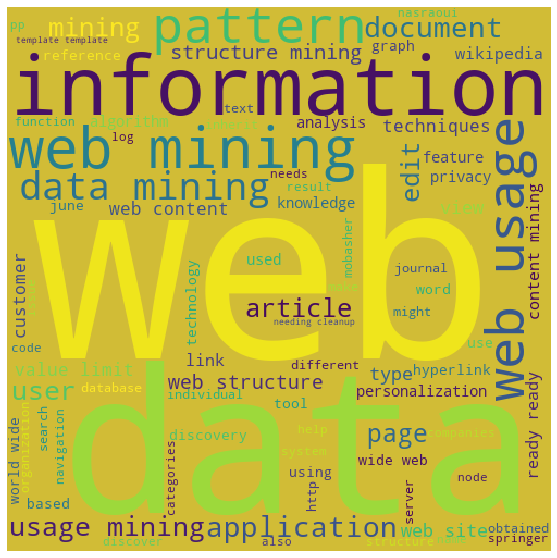

In [152]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

In [149]:
x2=' '.join(f_f1)
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='#8ae6df', 
                stopwords = stop_words, 
                min_font_size = 8).generate(x2) 

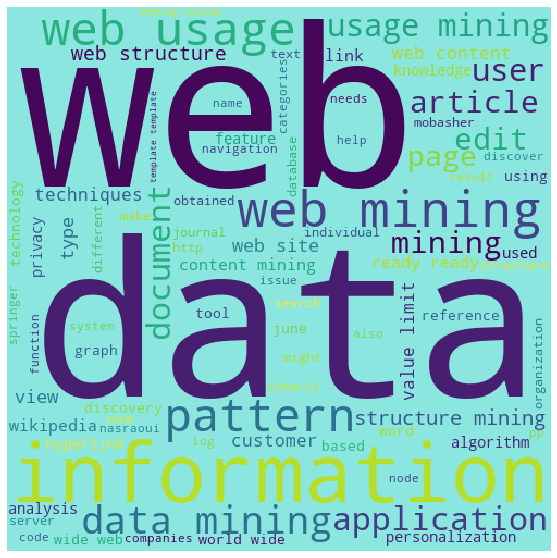

In [150]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

In [148]:
n=int(input("number of sentences: "))
for k in range(n):
    print("Enter the sentence",k+1)
    sent=input()
    sent=word_tokenize(sent)
    sent=[w for w in sent if not w in stop_words]
    synonyms = []
    d={}
    for w in sent:
        for syn in wordnet.synsets(w):
            for lm in syn.lemmas():
                synonyms.append(lm.name())
        d[w]=list(set(synonyms))
        synonyms=[]
    c=1
    print("Paraphrased sentence for",k+1)
    print()
    for _ in range(3):
        print(_+1,'. ',end='')
        for i in sent:
            a=d[i]
            if len(a)>=4:
                print(a[c],end=' ')
            else:
                print(i,end=' ')
        print()
        c+=1
    print()

number of sentences: 4
Enter the sentence 1
The quick brown fox jumps over the lazy dog
Paraphrased sentence for 1

1 . The fast embrown fuddle jump_out faineant dog 
2 . The promptly John_Brown fob alternate otiose bounder 
3 . The warm dark-brown throw leap_out slothful frump 

Enter the sentence 2
Obama and Putin met the previous week
Paraphrased sentence for 2

1 . Obama Putin run_across late calendar_week 
2 . Obama Putin forgather premature hebdomad 
3 . Obama Putin converge previous week 

Enter the sentence 3
At least 12 people were killed in the battle last week
Paraphrased sentence for 3

1 . At least XII the_great_unwashed belt_down battle hold_up calendar_week 
2 . atomic_number_85 least 12 masses pour_down conflict lowest hebdomad 
3 . at least twelve mass wipe_out combat finis week 

Enter the sentence 4
I will go home and come back tomorrow.
Paraphrased sentence for 4

1 . unity fit home make_out rearward tomorrow 
2 . iodine whirl dwelling cum punt tomorrow 
3 . i exten